In [24]:
from IPython.display import display
import numpy as np
import cv2
import pandas as pd
from PIL import Image
import os


df = pd.DataFrame(columns = ["image","top-left","bottom-left","top-right","bottom-right"])

for image in os.listdir():
    if (image.endswith(".png") or image.endswith(".png")):

        im = Image.open(image)
        width, height = im.size
        im1 = im.crop((0, 0, width/5, height/4))
        im2 = im.crop((0, 3*height/4, width/5, height))
        im3 = im.crop((4 * width/5, 0, width, height/4))
        im4 = im.crop((4 * width/5, 3*height/4, width, height)) 

        top_left = "0"
        bottom_left = "0"
        top_right = "0"
        bottom_right = "0"
        
        for i,corner in enumerate([im1,im2,im3,im4]):

            img = cv2.cvtColor(np.array(corner), cv2.COLOR_RGB2BGR)
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            edges = cv2.Canny(gray,150,400,apertureSize = 3)
            minLineLength=50
            lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=50,lines=np.array([]), minLineLength=minLineLength,maxLineGap=20)
            if i == 0:
              line = np.amin(lines, axis = 0)
              if(abs(line[0][0]-line[0][2])>5):
                top_left = "1"
            if i == 1:
              line = np.amin(lines, axis = 0)
              if(abs(line[0][0]-line[0][2])>5):
                bottom_left = "1"
            if i == 2:
              line = np.amax(lines, axis = 0)
              if(abs(line[0][0]-line[0][2])>5):
                top_right = "1"
            if i == 3:
              line = np.amax(lines, axis = 0)
              if(abs(line[0][0]-line[0][2])>5):
                bottom_right = "1"
                "serial","series","top-left","bottom-left","top-right","bottom-right"
        new_row = {'image':image,'top-left':top_left, 'bottom-left':bottom_left,
                   'top-right':top_right,'bottom-right':bottom_right}
        df = df.append(new_row, ignore_index=True)

        

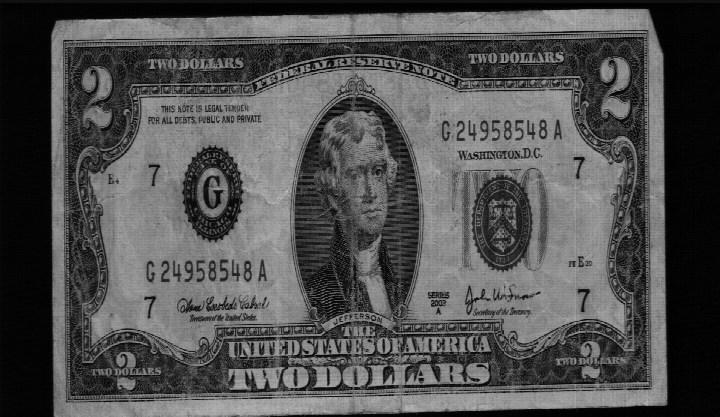

                image top-left bottom-left top-right bottom-right
OCR00010765_big_0.png        0           0         1            0
----------------------------------------------------------------------------------------------


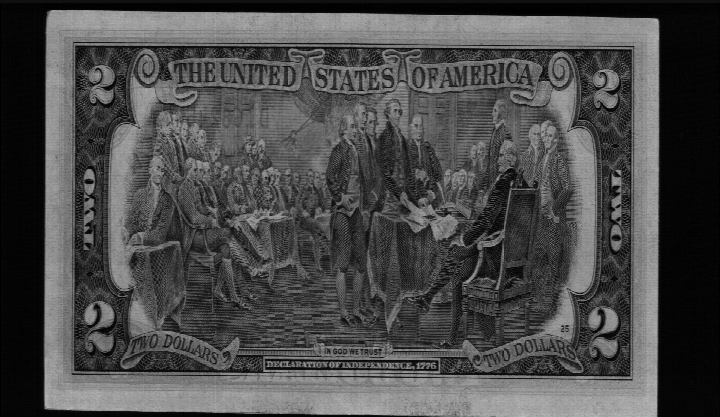

                image top-left bottom-left top-right bottom-right
OCR00010764_big_1.png        0           0         0            0
----------------------------------------------------------------------------------------------


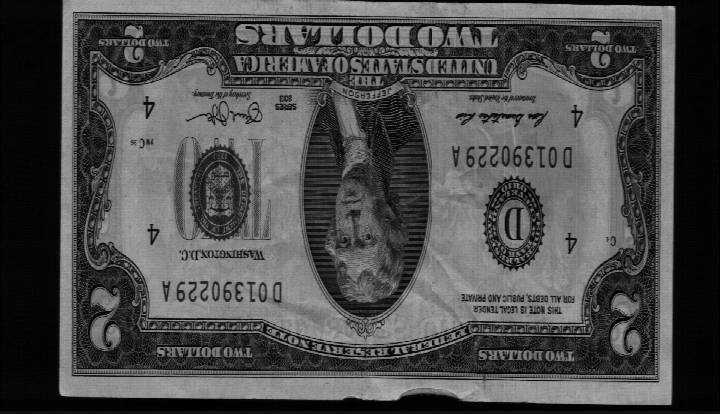

                image top-left bottom-left top-right bottom-right
OCR00010758_big_1.png        0           0         0            0
----------------------------------------------------------------------------------------------


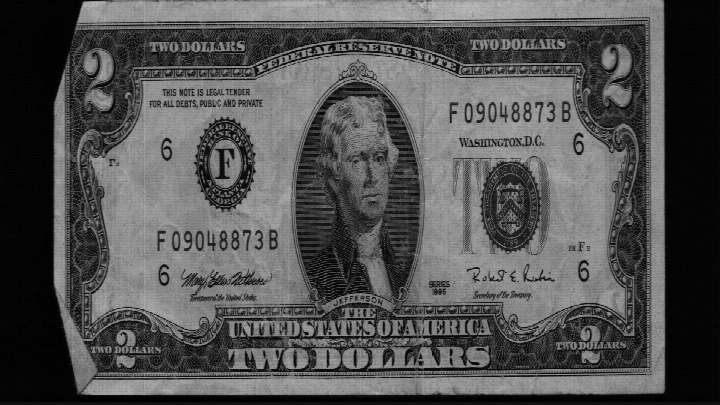

                image top-left bottom-left top-right bottom-right
OCR00010767_big_0.png        1           1         0            0
----------------------------------------------------------------------------------------------


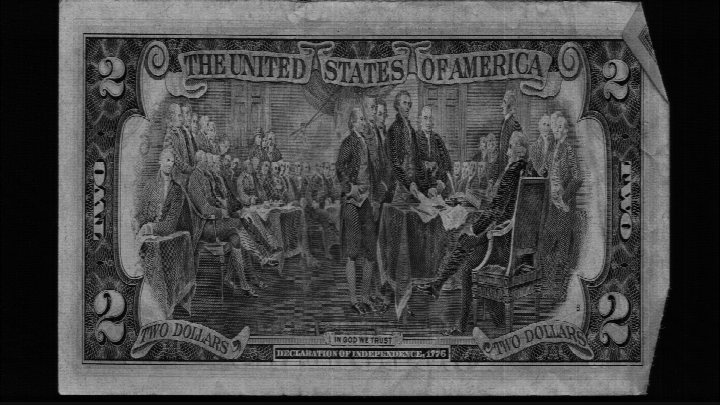

                image top-left bottom-left top-right bottom-right
OCR00010767_big_1.png        0           0         1            1
----------------------------------------------------------------------------------------------


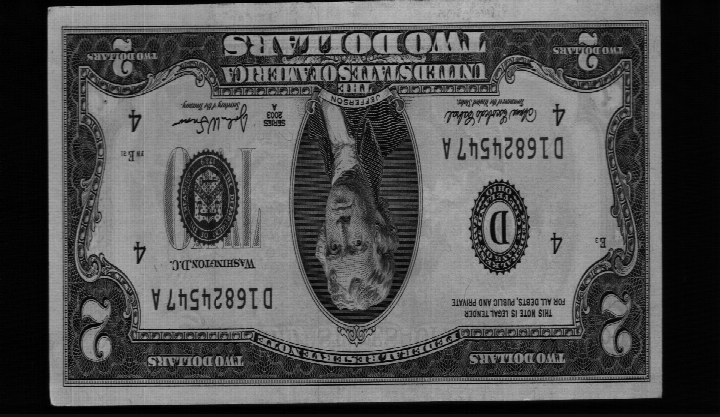

                image top-left bottom-left top-right bottom-right
OCR00010764_big_0.png        0           0         0            0
----------------------------------------------------------------------------------------------


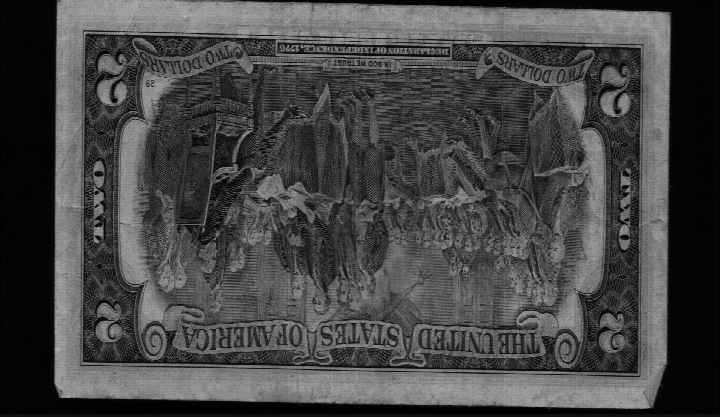

                image top-left bottom-left top-right bottom-right
OCR00010765_big_1.png        0           0         0            1
----------------------------------------------------------------------------------------------


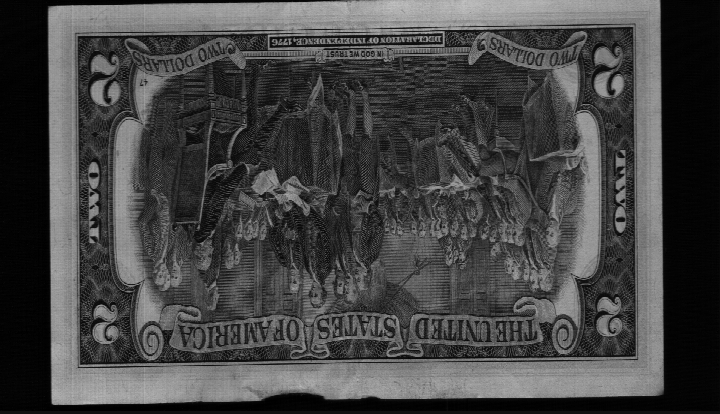

                image top-left bottom-left top-right bottom-right
OCR00010758_big_0.png        0           0         0            0
----------------------------------------------------------------------------------------------


In [25]:
for i in df.image.tolist():
  im = Image.open(i)
  display(im)
  df1 = df[df.image == i]
  print(df1.to_string(index=False))
  print("----------------------------------------------------------------------------------------------")
    